In [17]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display



def mel_spectogram_db(file_name, mels=60):
    """Returns the mel spectrogram for a given audio file and mel count
        Args:
            file_name (str): File name of the WAV file
            mels (int): Target length in seconds
        Returns:
            numpy.ndarray: Numpy array of mel spectrogram values
    """
    data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    mel_spectogram = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=mels)
    mel_db = librosa.power_to_db(mel_spectogram, ref=np.max)
    return mel_db.T




In [19]:
# DISPLAY WAVEPLOT
def display_waveplot(file_name, output_file_name):
    x, sr = librosa.load(file_name)
    plt.figure(figsize=(8, 4))
    librosa.display.waveplot(x, sr=sr)
    plt.title(file_name)
    plt.savefig(output_file_name)

In [27]:
female_neutral_file = 'data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav'
female_angry_strong_file = 'data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-05-02-01-01-01.wav'

male_neutral_file = 'data/RAVDESS/Audio_Speech_Actors_01-24/Actor_02/03-01-01-01-01-01-02.wav'
male_angry_strong_file = 'data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-05-02-01-01-01.wav'

female_neutral_image = 'images/female_neutral.jpeg'
female_angry_strong_image = 'images/female_angry_strong.jpeg'

male_neutral_image = 'images/male_neutral.jpeg'
male_angry_strong_image = 'images/male_angry_strong.jpeg'

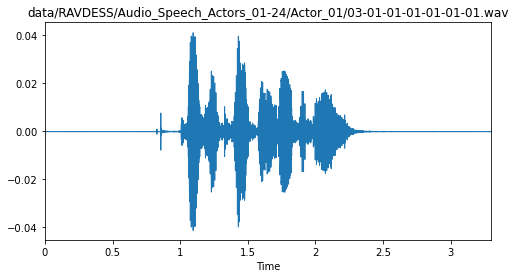

In [20]:
display_waveplot(female_neutral_file, female_neutral_image)

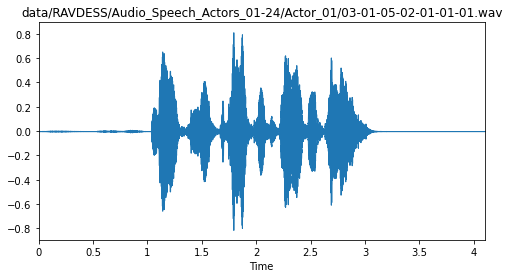

In [26]:
display_waveplot(female_angry_strong_file, female_angry_strong_image)

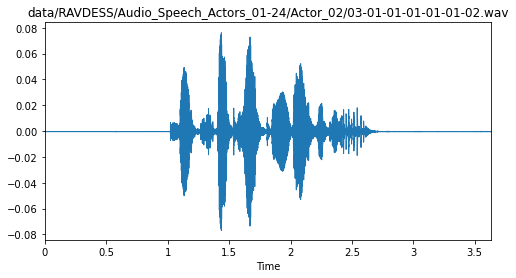

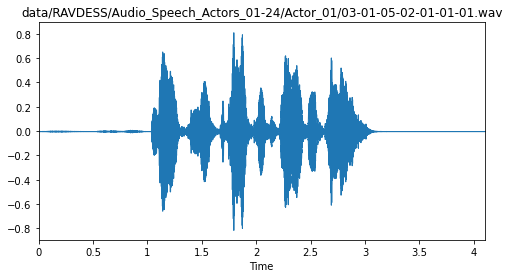

In [28]:
display_waveplot(male_neutral_file, male_neutral_image)
display_waveplot(male_angry_strong_file, male_angry_strong_image)

In [5]:
mel = mel_spectogram_db('/Users/simiya/自己的学习/jedha/projet_son_jedha/Projet-Son-Jedha/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

In [6]:
mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [8]:
len(mel)

143

In [9]:
mel2 = mel_spectogram_db('/Users/simiya/自己的学习/jedha/projet_son_jedha/Projet-Son-Jedha/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-02-01.wav')
mel2

array([[-79.93067, -80.     , -80.     , ..., -80.     , -80.     ,
        -80.     ],
       [-80.     , -80.     , -80.     , ..., -80.     , -80.     ,
        -80.     ],
       [-80.     , -80.     , -80.     , ..., -80.     , -80.     ,
        -80.     ],
       ...,
       [-80.     , -80.     , -80.     , ..., -80.     , -80.     ,
        -80.     ],
       [-80.     , -80.     , -80.     , ..., -80.     , -80.     ,
        -80.     ],
       [-80.     , -80.     , -80.     , ..., -80.     , -80.     ,
        -80.     ]], dtype=float32)

In [10]:
mel3 = mel_spectogram_db('/Users/simiya/自己的学习/jedha/projet_son_jedha/Projet-Son-Jedha/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-02-01-01.wav')
mel3

array([[-57.022152, -68.52432 , -67.02614 , ..., -80.      , -80.      ,
        -80.      ],
       [-55.4332  , -64.36739 , -66.309364, ..., -80.      , -80.      ,
        -80.      ],
       [-52.85672 , -60.05863 , -66.24349 , ..., -80.      , -80.      ,
        -80.      ],
       ...,
       [-61.123913, -68.29418 , -68.33813 , ..., -80.      , -80.      ,
        -80.      ],
       [-61.19768 , -69.4604  , -69.262375, ..., -80.      , -80.      ,
        -80.      ],
       [-59.24215 , -64.753136, -68.81082 , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)